In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
input_data = pd.read_csv("C:\\Users\\91842\\OneDrive\\Desktop\\Machine Learning\\auto-mpg.csv")
input_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
input_data.shape

(398, 9)

In [20]:
input_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [21]:
for column in ['horsepower']:
    #input_data[column] = input_data[column].str.replace('?','')
    input_data[column] = pd.to_numeric(input_data[column], errors = 'coerce')
input_data[input_data['horsepower'].isna()]
input_data.dropna(axis = 0,inplace = True)

In [22]:
input_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [23]:
len(input_data['car name'].unique())

301

In [24]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [25]:
for col in input_data:
    print(col, input_data[col].value_counts().count())

mpg 127
cylinders 5
displacement 81
horsepower 93
weight 346
acceleration 95
model year 13
origin 3
car name 301


In [26]:
for i in input_data.columns:
    print(" Range of {} min {}, max {}" .format(i, min(input_data[i]), max(input_data[i])))

 Range of mpg min 9.0, max 46.6
 Range of cylinders min 3, max 8
 Range of displacement min 68.0, max 455.0
 Range of horsepower min 46.0, max 230.0
 Range of weight min 1613, max 5140
 Range of acceleration min 8.0, max 24.8
 Range of model year min 70, max 82
 Range of origin min 1, max 3
 Range of car name min amc ambassador brougham, max vw rabbit custom


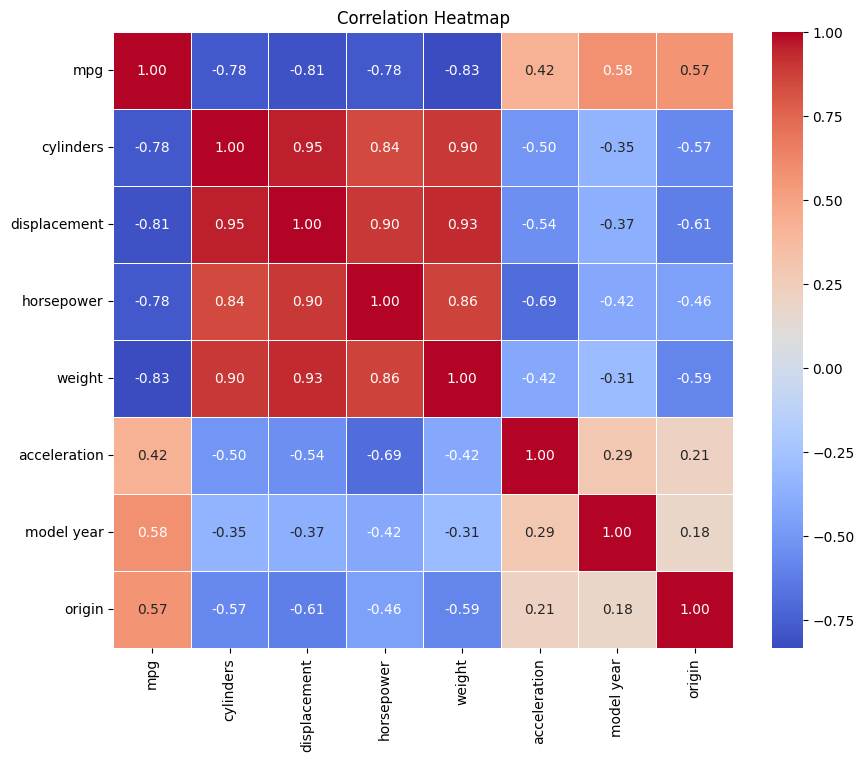

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'input_data' is your DataFrame containing the data
# Select only numeric columns
numeric_data = input_data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [28]:
input_data.drop(['car name'], axis = 1, inplace = True)
input_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [29]:
X = input_data.drop('mpg',axis=1)
y = input_data['mpg']

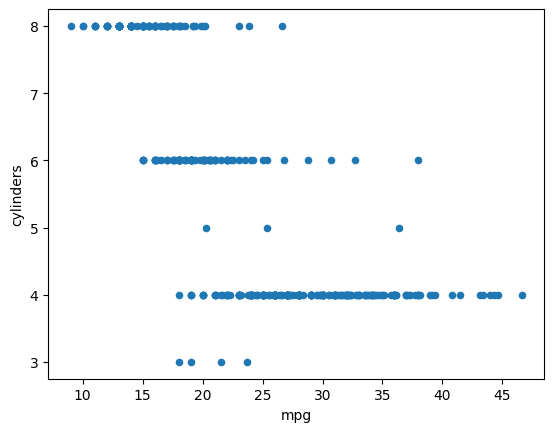

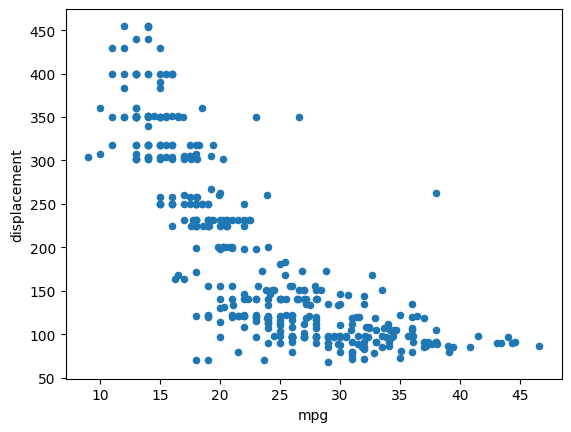

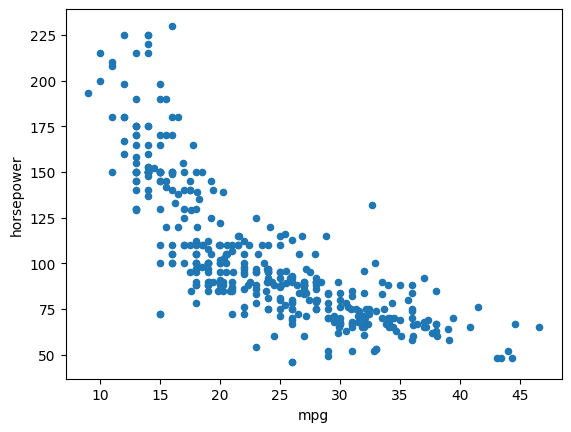

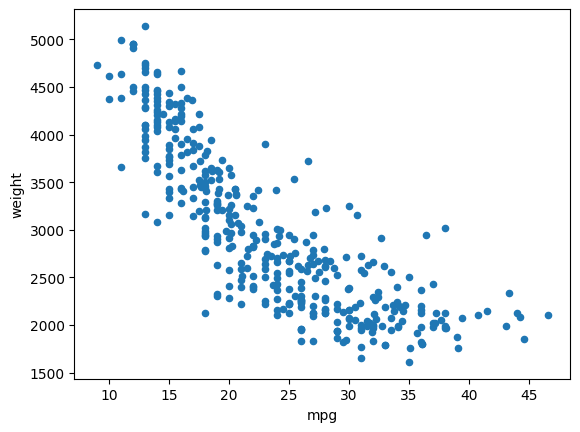

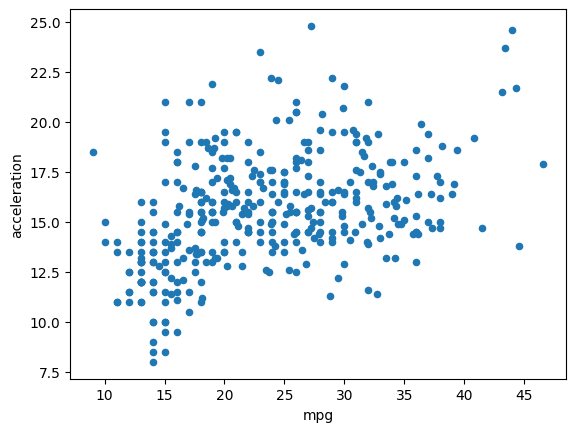

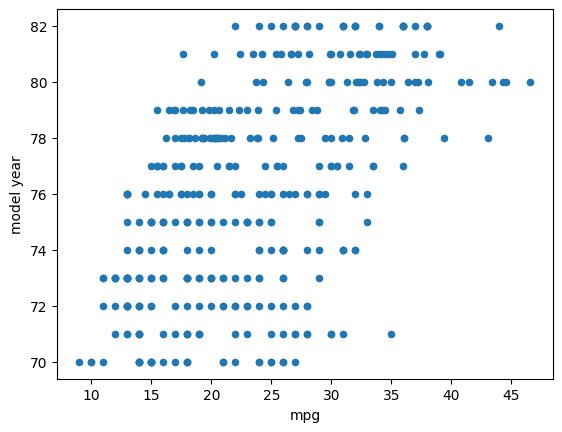

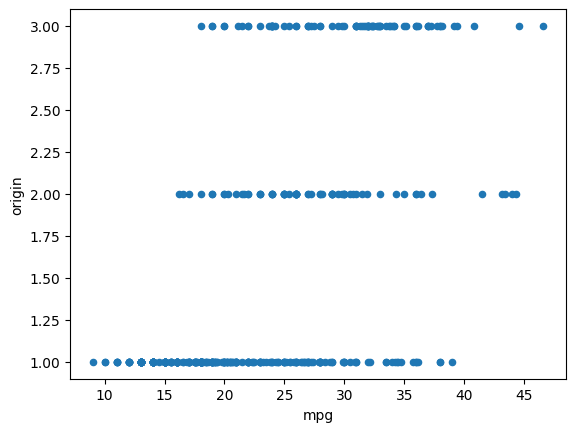

In [30]:
for col in X.columns:
    input_data.plot.scatter(x='mpg', y=col)

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming 'input_data' is your DataFrame containing the data
# Assuming 'X' contains features and 'y' contains target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lm_input_data = LinearRegression()
auto_mpg_model = lm_input_data.fit(X_train, y_train)

# Computing yhat (i.e., predictions) using X_test (i.e., test data)
yhat_lm = auto_mpg_model.predict(X_test)
yhat_lm = [round(x, 1) for x in yhat_lm]
print('\nLinear Regression Predictions:\n', yhat_lm[:20])

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
yhat_rf = rf_model.predict(X_test)
yhat_rf = [round(x, 1) for x in yhat_rf]
print('\nRandom Forest Regressor Predictions:\n', yhat_rf[:20])

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
yhat_svr = svr_model.predict(X_test)
yhat_svr = [round(x, 1) for x in yhat_svr]
print('\nSupport Vector Regressor Predictions:\n', yhat_svr[:20])

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
yhat_gb = gb_model.predict(X_test)
yhat_gb = [round(x, 1) for x in yhat_gb]
print('\nGradient Boosting Regressor Predictions:\n', yhat_gb[:20])

# Calculating and comparing mean squared error for each model
mse_lm = mean_squared_error(y_test, yhat_lm)
mse_rf = mean_squared_error(y_test, yhat_rf)
mse_svr = mean_squared_error(y_test, yhat_svr)
mse_gb = mean_squared_error(y_test, yhat_gb)

print('\nMean Squared Error (Linear Regression):', mse_lm)
print('Mean Squared Error (Random Forest):', mse_rf)
print('Mean Squared Error (Support Vector):', mse_svr)
print('Mean Squared Error (Gradient Boosting):', mse_gb)



Linear Regression Predictions:
 [25.8, 26.0, 34.5, 24.9, 28.4, 30.6, 8.6, 30.7, 20.6, 28.6, 12.6, 25.3, 16.8, 29.7, 21.8, 29.2, 20.4, 33.4, 26.7, 30.0]

Random Forest Regressor Predictions:
 [26.3, 22.3, 34.2, 30.2, 26.4, 28.2, 12.9, 28.5, 19.6, 30.8, 14.1, 20.2, 15.7, 27.3, 19.0, 29.4, 20.0, 33.1, 28.5, 31.3]

Support Vector Regressor Predictions:
 [29.2, 24.3, 31.8, 30.8, 24.4, 29.5, 13.2, 28.6, 20.4, 31.4, 16.2, 23.2, 14.0, 29.3, 19.3, 25.9, 21.7, 28.0, 25.4, 26.8]

Gradient Boosting Regressor Predictions:
 [26.7, 22.3, 34.6, 28.0, 27.5, 27.7, 12.8, 28.1, 18.8, 30.4, 13.5, 20.7, 17.8, 26.9, 19.6, 29.0, 19.6, 32.7, 29.0, 29.1]

Mean Squared Error (Linear Regression): 10.735063291139241
Mean Squared Error (Random Forest): 5.678227848101266
Mean Squared Error (Support Vector): 15.127341772151897
Mean Squared Error (Gradient Boosting): 6.439113924050631


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y, yhat), columns=['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual'] - comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err'] / comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    return comp_matrix, mean_value

# Assuming 'input_data' is your DataFrame containing the data
# Assuming 'X' contains features and 'y' contains target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lm_input_data = LinearRegression()
auto_mpg_model = lm_input_data.fit(X_train, y_train)

# Computing yhat (i.e., predictions) using X_test (i.e., test data)
yhat_lm = auto_mpg_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
yhat_rf = rf_model.predict(X_test)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
yhat_svr = svr_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
yhat_gb = gb_model.predict(X_test)

# Comparing predictions and calculating mean percentage error for each model
comp_matrix_lm, mean_pct_err_lm = compare_prediction(y_test, yhat_lm)
comp_matrix_rf, mean_pct_err_rf = compare_prediction(y_test, yhat_rf)
comp_matrix_svr, mean_pct_err_svr = compare_prediction(y_test, yhat_svr)
comp_matrix_gb, mean_pct_err_gb = compare_prediction(y_test, yhat_gb)

print('\nMean Percentage Error (Linear Regression):', mean_pct_err_lm)
print('Mean Percentage Error (Random Forest):', mean_pct_err_rf)
print('Mean Percentage Error (Support Vector):', mean_pct_err_svr)
print('Mean Percentage Error (Gradient Boosting):', mean_pct_err_gb)



Mean Percentage Error (Linear Regression): 11.78920947696087
Mean Percentage Error (Random Forest): 7.843419214737184
Mean Percentage Error (Support Vector): 12.468554331048045
Mean Percentage Error (Gradient Boosting): 8.141168423333031


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y, yhat), columns=['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual'] - comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err'] / comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    return comp_matrix, mean_value

# Assuming 'input_data' is your DataFrame containing the data
# Assuming 'X' contains features and 'y' contains target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lm_input_data = LinearRegression()
auto_mpg_model = lm_input_data.fit(X_train, y_train)

# Computing yhat (i.e., predictions) using X_test (i.e., test data)
yhat_lm = auto_mpg_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
yhat_rf = rf_model.predict(X_test)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
yhat_svr = svr_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
yhat_gb = gb_model.predict(X_test)

# Comparing predictions and calculating mean percentage error for each model
comp_matrix_lm, mean_pct_err_lm = compare_prediction(y_test, yhat_lm)
comp_matrix_rf, mean_pct_err_rf = compare_prediction(y_test, yhat_rf)
comp_matrix_svr, mean_pct_err_svr = compare_prediction(y_test, yhat_svr)
comp_matrix_gb, mean_pct_err_gb = compare_prediction(y_test, yhat_gb)

print("\nLinear Regression:")
print("Model prediction comparison and mean error:\n", comp_matrix_lm)
accuracy_lm = round((100 - mean_pct_err_lm), 2)
print('Model accuracy =', accuracy_lm)

print("\nRandom Forest Regressor:")
print("Model prediction comparison and mean error:\n", comp_matrix_rf)
accuracy_rf = round((100 - mean_pct_err_rf), 2)
print('Model accuracy =', accuracy_rf)

print("\nSupport Vector Regressor:")
print("Model prediction comparison and mean error:\n", comp_matrix_svr)
accuracy_svr = round((100 - mean_pct_err_svr), 2)
print('Model accuracy =', accuracy_svr)

print("\nGradient Boosting Regressor:")
print("Model prediction comparison and mean error:\n", comp_matrix_gb)
accuracy_gb = round((100 - mean_pct_err_gb), 2)
print('Model accuracy =', accuracy_gb)



Linear Regression:
Model prediction comparison and mean error:
     Actual  Predicted       Err     PctErr
0     26.0  25.841562  0.158438   0.609379
1     21.6  26.036745  4.436745  20.540484
2     36.1  34.506018  1.593982   4.415462
3     26.0  24.895532  1.104468   4.247954
4     27.0  28.425987  1.425987   5.281434
..     ...        ...       ...        ...
74    17.6  24.164562  6.564562  37.298648
75    28.0  24.063693  3.936307  14.058238
76    15.0  14.015525  0.984475   6.563167
77    16.0  14.858753  1.141247   7.132797
78    27.0  25.759440  1.240560   4.594667

[79 rows x 4 columns]
Model accuracy = 88.21

Random Forest Regressor:
Model prediction comparison and mean error:
     Actual  Predicted    Err     PctErr
0     26.0     26.317  0.317   1.219231
1     21.6     22.288  0.688   3.185185
2     36.1     34.201  1.899   5.260388
3     26.0     30.165  4.165  16.019231
4     27.0     26.447  0.553   2.048148
..     ...        ...    ...        ...
74    17.6     24.084 

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import math

def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y, yhat), columns=['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual'] - comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err'] / comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    return comp_matrix, mean_value

# Assuming 'input_data' is your DataFrame containing the data
# Assuming 'X' contains features and 'y' contains target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lm_input_data = LinearRegression()
auto_mpg_model = lm_input_data.fit(X_train, y_train)
yhat_lm = auto_mpg_model.predict(X_test)
MSE_lm = mean_squared_error(y_test, yhat_lm)
RMSE_lm = math.sqrt(MSE_lm)
print('Linear Regression:')
print(f'Mean Squared Error : {MSE_lm}, Root Mean Squared Error : {RMSE_lm}')

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
yhat_rf = rf_model.predict(X_test)
MSE_rf = mean_squared_error(y_test, yhat_rf)
RMSE_rf = math.sqrt(MSE_rf)
print('\nRandom Forest Regressor:')
print(f'Mean Squared Error : {MSE_rf}, Root Mean Squared Error : {RMSE_rf}')

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
yhat_svr = svr_model.predict(X_test)
MSE_svr = mean_squared_error(y_test, yhat_svr)
RMSE_svr = math.sqrt(MSE_svr)
print('\nSupport Vector Regressor:')
print(f'Mean Squared Error : {MSE_svr}, Root Mean Squared Error : {RMSE_svr}')

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
yhat_gb = gb_model.predict(X_test)
MSE_gb = mean_squared_error(y_test, yhat_gb)
RMSE_gb = math.sqrt(MSE_gb)
print('\nGradient Boosting Regressor:')
print(f'Mean Squared Error : {MSE_gb}, Root Mean Squared Error : {RMSE_gb}')

Linear Regression:
Mean Squared Error : 10.710864418838366, Root Mean Squared Error : 3.2727457003009515

Random Forest Regressor:
Mean Squared Error : 5.680200075949368, Root Mean Squared Error : 2.3833170321947033

Support Vector Regressor:
Mean Squared Error : 15.127838959571406, Root Mean Squared Error : 3.889452269866723

Gradient Boosting Regressor:
Mean Squared Error : 6.415153366258091, Root Mean Squared Error : 2.532815304410902


In [35]:
# Linear Regression
r2_lm = auto_mpg_model.score(X_test, y_test)
print(f'R-squared (Linear Regression): {r2_lm}')

# Random Forest Regressor
r2_rf = rf_model.score(X_test, y_test)
print(f'R-squared (Random Forest Regressor): {r2_rf}')

# Support Vector Regressor
r2_svr = svr_model.score(X_test, y_test)
print(f'R-squared (Support Vector Regressor): {r2_svr}')

# Gradient Boosting Regressor
r2_gb = gb_model.score(X_test, y_test)
print(f'R-squared (Gradient Boosting Regressor): {r2_gb}')


R-squared (Linear Regression): 0.7901500386760352
R-squared (Random Forest Regressor): 0.888712085258602
R-squared (Support Vector Regressor): 0.7036115577191179
R-squared (Gradient Boosting Regressor): 0.8743126947411621


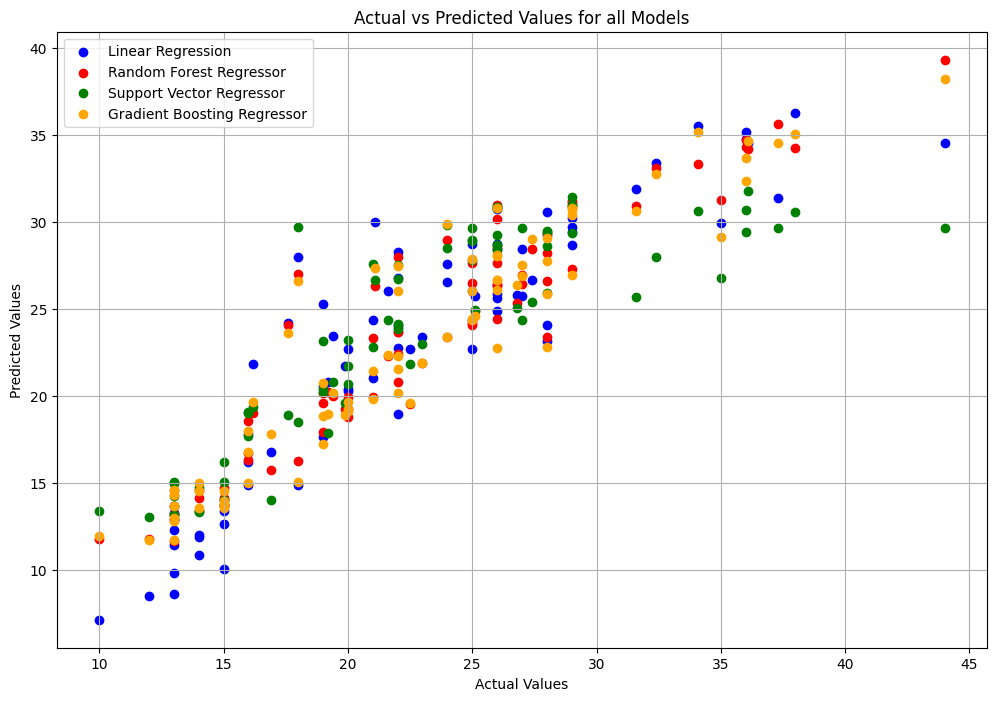

In [34]:
import matplotlib.pyplot as plt

# Combine actual and predicted values for all models into a single DataFrame
df_compare = pd.DataFrame({'Actual': y_test,
                           'Predicted (Linear Regression)': yhat_lm,
                           'Predicted (Random Forest Regressor)': yhat_rf,
                           'Predicted (Support Vector Regressor)': yhat_svr,
                           'Predicted (Gradient Boosting Regressor)': yhat_gb})

# Plotting actual vs predicted values for all models
plt.figure(figsize=(12, 8))

plt.scatter(df_compare['Actual'], df_compare['Predicted (Linear Regression)'], label='Linear Regression', color='blue')
plt.scatter(df_compare['Actual'], df_compare['Predicted (Random Forest Regressor)'], label='Random Forest Regressor', color='red')
plt.scatter(df_compare['Actual'], df_compare['Predicted (Support Vector Regressor)'], label='Support Vector Regressor', color='green')
plt.scatter(df_compare['Actual'], df_compare['Predicted (Gradient Boosting Regressor)'], label='Gradient Boosting Regressor', color='orange')

plt.title('Actual vs Predicted Values for all Models')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# Dictionary to store R-squared values for each model
r_squared_values = {
    'Linear Regression': r2_lm,
    'Random Forest Regressor': r2_rf,
    'Support Vector Regressor': r2_svr,
    'Gradient Boosting Regressor': r2_gb
}

# Finding the best regressor
best_regressor = max(r_squared_values, key=r_squared_values.get)
best_r_squared = r_squared_values[best_regressor]

print(f"The best regressor is '{best_regressor}' with an R-squared value of {best_r_squared}.")


The best regressor is 'Random Forest Regressor' with an R-squared value of 0.888712085258602.


In [43]:
from sklearn.model_selection import GridSearchCV

# Assuming 'input_data' is your DataFrame containing the data
# Assuming 'X' contains features and 'y' contains target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for the best regressor
hyperparameters = {}

if best_regressor == 'Linear Regression':
    # Linear Regression doesn't have hyperparameters to tune
    best_model = auto_mpg_model
elif best_regressor == 'Random Forest Regressor':
    # Define hyperparameters for Random Forest Regressor
    hyperparameters = {
        'n_estimators': [10, 50, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    # Initialize GridSearchCV for Random Forest Regressor
    grid_search = GridSearchCV(rf_model, hyperparameters, cv=5, scoring='r2')
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    # Get the best model
    best_model = grid_search.best_estimator_
elif best_regressor == 'Support Vector Regressor':
    # Define hyperparameters for Support Vector Regressor
    hyperparameters = {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5],
        'kernel': ['linear', 'rbf']
    }
    # Initialize GridSearchCV for Support Vector Regressor
    grid_search = GridSearchCV(svr_model, hyperparameters, cv=5, scoring='r2')
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    # Get the best model
    best_model = grid_search.best_estimator_
elif best_regressor == 'Gradient Boosting Regressor':
    # Define hyperparameters for Gradient Boosting Regressor
    hyperparameters = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    # Initialize GridSearchCV for Gradient Boosting Regressor
    grid_search = GridSearchCV(gb_model, hyperparameters, cv=5, scoring='r2')
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    # Get the best model
    best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", best_model.get_params())

# Evaluate the best model
yhat_best = best_model.predict(X_test)
MSE_best = mean_squared_error(y_test, yhat_best)
RMSE_best = math.sqrt(MSE_best)
r2_best = best_model.score(X_test, y_test)
print('\nBest Model:')
print(f'Mean Squared Error : {MSE_best}, Root Mean Squared Error : {RMSE_best}, R-squared: {r2_best}')


Best hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Best Model:
Mean Squared Error : 5.941045123782303, Root Mean Squared Error : 2.437425921701479, R-squared: 0.8836015431903993
